In [71]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random

import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, 
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, accuracy_score)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [72]:
train2=os.listdir("/Users/jarvis/pymycod/SIH/final-dataset/train/")

In [73]:
train2

['Urticaria Hives',
 'Acne and Rosacea ',
 'Seborrheic Keratoses and other Benign Tumors',
 '.DS_Store',
 'Hair Loss Alopecia and other Hair Diseases',
 'Eczema',
 'Vascular Tumors',
 'Atopic Dermatitis ',
 'Exanthems and Drug Eruptions',
 'Lupus and other Connective Tissue diseases',
 'Poison Ivy and other Contact Dermatitis',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Bullous Disease',
 'Nail Fungus and other Nail Disease',
 'Herpes HPV and other STDs ',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Systemic Disease',
 'Light Diseases and Disorders of Pigmentation',
 'Warts Molluscum and other Viral Infections',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Vasculitis',
 'Melanoma Skin Cancer Nevi and Moles',
 'Psoriasis Lichen Planus and related diseases',
 'Cellulitis Impetigo and other Bacterial Infections']

In [74]:
cat2=['Melanoma Skin Cancer Nevi and Moles']

In [129]:
cat=['Tinea Ringworm Candidiasis and other Fungal Infections','Seborrheic Keratoses and other Benign Tumors','Melanoma Skin Cancer Nevi and Moles','Herpes HPV and other STDs ',
 'Eczema','Acne and Rosacea ']

In [130]:
def data_dictionary():
    path_train="/Users/jarvis/pymycod/SIH/final-dataset/train/"
    path_test="/Users/jarvis/pymycod/SIH/final-dataset/test/"
    list_train=cat#os.listdir(path_train)
    list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j            
            if img_path_train!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
                
                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k) 
        k+=1
    for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j            
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(4)
    train_df=pd.DataFrame(train_dictionary)
    print(train_dictionary["target"])
    return  train_df

In [131]:
train=data_dictionary()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
train

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  5730 non-null   object
 1   target      5730 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.7+ KB


In [79]:


import cv2
images=[]
label=[]
for i in train['image_path']:
    if i!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
        img=cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(180,180))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
        #img=resize_and_rescale(img)
        images.append(img)


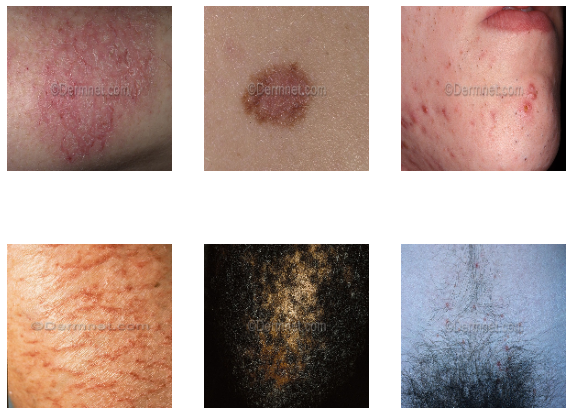

In [80]:

# Create a list of example inputs to our Gradio demo
example_list = [image for image in random.sample(images, k=6)]

# Plot the images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for ax, img_array in zip(axes.ravel(), example_list):
    ax.imshow(img_array)
    ax.axis('off')

plt.show()


In [81]:
label=train['target']

In [82]:
len(label)

5730

In [125]:
label

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [83]:
len(images)

5730

In [84]:
import numpy as np
import pandas as pd

In [85]:
data=np.array(images)


In [86]:
label=np.array(label)

In [126]:
label

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [87]:
data.shape

(5730, 180, 180, 3)

In [88]:
label.shape

(5730,)

In [89]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3)) 

In [90]:
# let's make all layers non-trainable
for layer in vgg_model.layers : 
    layer.trainable = False

In [91]:
from keras.utils.vis_utils import plot_model
plot_model(vgg_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense


In [93]:
model=Sequential([ 
                   
                    Dense(200,activation='relu'),
                  Dense(170,activation='relu'),
                  Dense(6,activation='softmax'),

])

In [94]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [95]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

In [96]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [97]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split 
kf = KFold(n_splits = 3)


In [98]:
import keras
acc=[]
num_classes = 6
label = keras.utils.to_categorical(label, num_classes)

In [99]:
label.shape


(5730, 6)

In [100]:

for i in range(3): 
    x_train,x_test, y_train, y_test=train_test_split(data, label, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])
    print(x_train.shape)
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features_train=vgg_model.predict(x_train)
    features_test=vgg_model.predict(x_test)
    print(features_train.shape)
    num_train=x_train.shape[0]
    num_test=x_test.shape[0]
    print(num_train)
    print(num_test)
    x_test=features_test.reshape(num_test,-1)
    x_train=features_train.reshape(num_train,-1)
    print(x_train.shape)
    print(x_train.shape)
    #x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0]) 
#     history=model.fit(x_train,y_train,epochs=15,batch_size=32,verbose=1) 
#     model.evaluate(x_test,y_test)

(4584, 180, 180, 3)


2023-09-12 11:01:43.378377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 18s 506ms/step
(4584, 5, 5, 512)
4584
1146
(4584, 12800)
(4584, 12800)
(4584, 180, 180, 3)
36/36 [==============================] - 18s 525ms/step
(4584, 5, 5, 512)
4584
1146
(4584, 12800)
(4584, 12800)
(4584, 180, 180, 3)
36/36 [==============================] - 18s 516ms/step
(4584, 5, 5, 512)
4584
1146
(4584, 12800)
(4584, 12800)


In [101]:
history = model.fit(x_train, y_train, epochs=50)


Epoch 1/50


2023-09-12 11:06:18.825233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 12s 66ms/step - loss: 3.0940 - accuracy: 0.4363
Epoch 2/50
144/144 [==============================] - 7s 51ms/step - loss: 0.8894 - accuracy: 0.6874
Epoch 3/50
144/144 [==============================] - 7s 50ms/step - loss: 0.4875 - accuracy: 0.8244
Epoch 4/50
144/144 [==============================] - 7s 51ms/step - loss: 0.3055 - accuracy: 0.8979
Epoch 5/50
144/144 [==============================] - 7s 50ms/step - loss: 0.2675 - accuracy: 0.9112
Epoch 6/50
144/144 [==============================] - 7s 50ms/step - loss: 0.1730 - accuracy: 0.9479
Epoch 7/50
144/144 [==============================] - 7s 50ms/step - loss: 0.1575 - accuracy: 0.9583
Epoch 8/50
144/144 [==============================] - 7s 50ms/step - loss: 0.3045 - accuracy: 0.9169
Epoch 9/50
144/144 [==============================] - 7s 51ms/step - loss: 0.3272 - accuracy: 0.9097
Epoch 10/50
144/144 [==============================] - 7s 51ms/step - loss: 0.3318 - accuracy: 0.9151

In [102]:
model.save('6claass.h5')

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# from mlxtend.plotting import plot_confusion_matrix

In [115]:
y_pred=model.predict(x_test)

36/36 [==============================] - 0s 6ms/step


In [116]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([5, 1, 5, ..., 4, 1, 5])

In [106]:
y_test=np.argmax(y_test, axis=1)

In [107]:
y_test

array([1, 5, 5, ..., 2, 1, 5])

In [119]:
# confusion_matrix_result=confusion_matrix(y_test,y_pred2)
g=accuracy_score(y_test,y_pred2)
g

0.5706806282722513

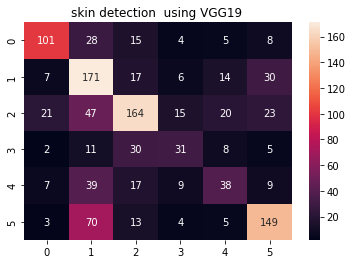

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt     
import pylab as pl
plt.title("skin detection  using VGG19 ")

ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

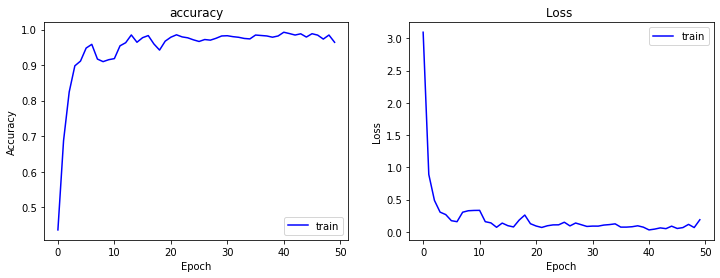

In [110]:
train_accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))
# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')

plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')

plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [111]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [112]:
confusion_matrix=classification_report(y_test,y_pred2)

In [113]:
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.72      0.63      0.67       161
           1       0.47      0.70      0.56       245
           2       0.64      0.57      0.60       290
           3       0.45      0.36      0.40        87
           4       0.42      0.32      0.36       119
           5       0.67      0.61      0.64       244

    accuracy                           0.57      1146
   macro avg       0.56      0.53      0.54      1146
weighted avg       0.58      0.57      0.57      1146



In [151]:
import tensorflow as tf
import numpy as np
import cv2

import tensorflow as tf
import numpy as np
import cv2

def predict_skin_disease(image_path):
    # Load saved model
    model = tf.keras.models.load_model('/Users/jarvis/pymycod/SIH/6claass.h5')

    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    img=vgg_model.predict(img)
    img=img.reshape(1,-1)
    
    # Make prediction on preprocessed image
    pred = model.predict(img)[0]
    predicted_class = np.argmax(pred)
    cat=['Tinea Ringworm Candidiasis and other Fungal Infections','Seborrheic Keratoses and other Benign Tumors','Melanoma Skin Cancer Nevi and Moles','Herpes HPV and other STDs ',
 'Eczema','Acne and Rosacea ']
    
    return cat[predicted_class]



print(predict_skin_disease("/Users/jarvis/pymycod/SIH/melanoma512/512x512-test/512x512-test/ISIC_0052349.jpg"))

1/1 [==============================] - 0s 45ms/step


2023-09-12 14:23:06.334180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 328ms/step
Melanoma Skin Cancer Nevi and Moles


In [ ]:
print(y_train)

In [ ]:
# import tensorflow as tf
# import numpy as np
# import cv2

# def predict_skin_disease(image_path):
#     # Define list of class names
#     class_names = ["Acne","Eczema","Atopic","Psoriasis","Tinea","vitiligo"]

#     # Load saved model
#     model = tf.keras.models.load_model('6claass.h5')

#     # Load and preprocess image
#     img = cv2.imread(image_path)
#     img = cv2.resize(img, (180, 180))
#     img = np.array(img) / 255.0
#     img = np.expand_dims(img, axis=0)
#     img = vgg_model.predict(img)
#     img = img.reshape(1, -1)

#     # Make prediction on preprocessed image
#     pred = model.predict(img)[0]
#     predicted_class_index = np.argmax(pred)
#     predicted_class_name = class_names[predicted_class_index]

#     return predicted_class_name

# print(predict_skin_disease("/kaggle/input/dermnet/test/Atopic Dermatitis Photos/03ichthyosis050127.jpg"))
